# function estimation using neural network

In [1]:
# example of fitting a neural net on x vs x^2
%matplotlib inline 

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot

In [3]:
# define the dataset
#x = asarray([i for i in range(-50,51)])
x = np.arange(-50,50,0.1)
# y = asarray([i**3-2*i**2  for i in x ])
y = asarray([i**2  for i in x ])
# y = asarray([(i-1.0)/(2*i+1.0)  for i in x if (i != -0.5)])
print(x.min(), x.max(), y.min(), y.max())
# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())


-50.0 49.90000000000143 5.048709793414476e-25 2500.0
0.0 1.0 0.0 1.0


In [4]:
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, kernel_initializer='he_uniform'))
#model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=1)
# make predictions for the input data
yhat = model.predict(x)


Epoch 1/500
100/100 [==============================] - 0s 433us/step - loss: 0.4923
Epoch 2/500
100/100 [==============================] - 0s 423us/step - loss: 0.1778
Epoch 3/500
100/100 [==============================] - 0s 433us/step - loss: 0.1466
Epoch 4/500
100/100 [==============================] - 0s 433us/step - loss: 0.1264
Epoch 5/500
100/100 [==============================] - 0s 433us/step - loss: 0.1112
Epoch 6/500
100/100 [==============================] - 0s 423us/step - loss: 0.1007
Epoch 7/500
100/100 [==============================] - 0s 433us/step - loss: 0.0946
Epoch 8/500
100/100 [==============================] - 0s 428us/step - loss: 0.0917
Epoch 9/500
100/100 [==============================] - 0s 423us/step - loss: 0.0898
Epoch 10/500
100/100 [==============================] - 0s 423us/step - loss: 0.0895
Epoch 11/500
100/100 [==============================] - 0s 423us/step - loss: 0.0896
Epoch 12/500
100/100 [==============================] - 0s 423us/step - lo

100/100 [==============================] - 0s 806us/step - loss: 0.0896
Epoch 193/500
100/100 [==============================] - 0s 604us/step - loss: 0.0897
Epoch 194/500
100/100 [==============================] - 0s 756us/step - loss: 0.0893
Epoch 195/500
100/100 [==============================] - 0s 675us/step - loss: 0.0893
Epoch 196/500
100/100 [==============================] - 0s 574us/step - loss: 0.0893
Epoch 197/500
100/100 [==============================] - 0s 554us/step - loss: 0.0897
Epoch 198/500
100/100 [==============================] - 0s 604us/step - loss: 0.0895
Epoch 199/500
100/100 [==============================] - 0s 655us/step - loss: 0.0893
Epoch 200/500
100/100 [==============================] - 0s 584us/step - loss: 0.0893
Epoch 201/500
100/100 [==============================] - 0s 625us/step - loss: 0.0893
Epoch 202/500
100/100 [==============================] - 0s 574us/step - loss: 0.0893
Epoch 203/500
100/100 [==============================] - 0s 504us/st

100/100 [==============================] - 0s 433us/step - loss: 0.0893
Epoch 383/500
100/100 [==============================] - 0s 423us/step - loss: 0.0894
Epoch 384/500
100/100 [==============================] - 0s 433us/step - loss: 0.0892
Epoch 385/500
100/100 [==============================] - 0s 423us/step - loss: 0.0897
Epoch 386/500
100/100 [==============================] - 0s 423us/step - loss: 0.0895
Epoch 387/500
100/100 [==============================] - 0s 423us/step - loss: 0.0898
Epoch 388/500
100/100 [==============================] - 0s 433us/step - loss: 0.0895
Epoch 389/500
100/100 [==============================] - 0s 423us/step - loss: 0.0895
Epoch 390/500
100/100 [==============================] - 0s 423us/step - loss: 0.0895
Epoch 391/500
100/100 [==============================] - 0s 433us/step - loss: 0.0893
Epoch 392/500
100/100 [==============================] - 0s 423us/step - loss: 0.0898
Epoch 393/500
100/100 [==============================] - 0s 413us/st

MSE::: 558919.035
Root MSE::: 747.609
MAE::: 650.594


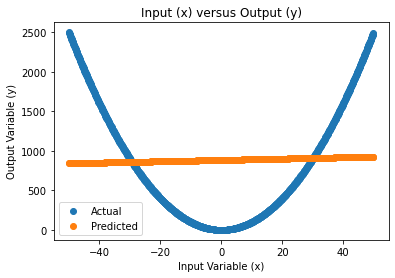

In [5]:
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

# report model error
print('MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot))
print('Root MSE::: %.3f' % mean_squared_error(y_plot, yhat_plot) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y_plot, yhat_plot))
# plot x vs y
pyplot.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
pyplot.scatter(x_plot,yhat_plot, label='Predicted')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()